# Hypothesis Testing

### Insurance Data

In [1]:
# Imports

import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv(r"C:\Users\badbr\Downloads\insurance - insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Do smokers have higher insurance charges than non-smokers?

## State the Hypothesis & Null Hypothesis

(Null Hypothesis): There is no difference between insurance charges for smokers vs non-smokers.

(Alternative Hypothesis): There is a significant difference between insurance charges for smokers vs non-smokers.

## Determine the correct test to perform.
Numerical Data
Two groups/samples
We want to run a 2-sample T-test.

In [4]:
## check the col that contains the measurement
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [5]:
## check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [9]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [11]:
## save list of columns needed for each group
needed_cols = ['is_smoker','charges']

df[needed_cols]

,is_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [12]:
## save smoker in separate variable
smoker_df = df.loc[ df['is_smoker']==True, needed_cols]
smoker_df

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [14]:
## save smoker in separate variable
non_smoker_df = df.loc[ df['is_smoker']==False, needed_cols]
non_smoker_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [15]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([non_smoker_df,smoker_df])
plot_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


<AxesSubplot: xlabel='is_smoker', ylabel='charges'>

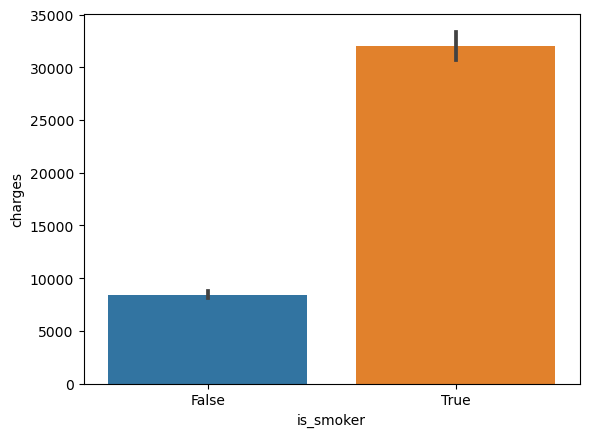

In [16]:
## visualize the group means
sns.barplot(data=plot_df, x='is_smoker', y='charges')

## Testing Assumptions
Significant outliers

Normality

Equal Variance

In [17]:
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [18]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [19]:
## Check non-smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
non_smoker_outliers.sum()

24

In [20]:
## remove outliers from female_group
non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

## Test Normality

In [22]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [23]:
## Check n for smoker group
len(smoker_group)

274

In [24]:
## Check male group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue

2.6945416315543976e-36

In [25]:
## Check n for non-smoker group
len(non_smoker_group)

1040

We have large enough groups that we can safely disregard the assumption of normality. (>15)

In [27]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group, non_smoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [28]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


We did NOT the assumption of normality nor did we meet the assumption of equal variance.

We will therefore run a Welch's t-test instead by adding equal_var=False to stats.ttest_ind

## Final Hypothesis Test - Welch's T-Test

In [29]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [30]:
smoker_group.mean()

32050.23183153284

In [31]:
non_smoker_group.mean()

7939.8608446721155

We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative there is a significant difference between insurance charges for smokers vs non-smokers.

# Q2) Are men more likely to smoke than women?

Null Hypothesis: There is no relationship between Sex and if someone smokes or not.

Alternative Hypothesis: A smokers Sex influenced if they smoke or do not smoke.

## Test to perform.
Categorical Data

Two groups/samples

Chi-Square

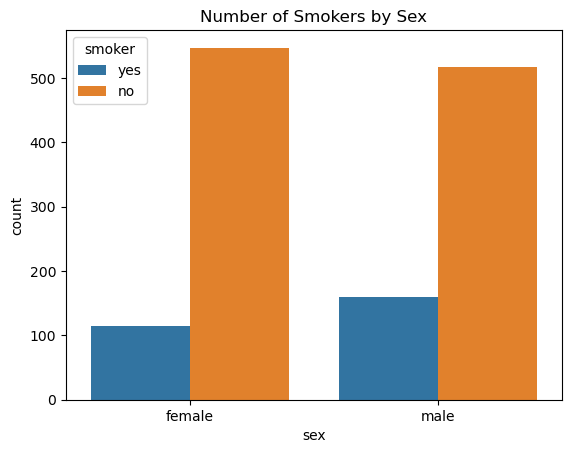

In [36]:
# Vizualize sex with smokers

ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [37]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [38]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [40]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that there is no relationship between sex and if they smoke.

This means that we accept the alternate hypothesis and conclude that there is a relationship between sex and smoking status.

# Q3) Do different regions have different charges, on average?

